In [64]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('full_devices.csv', encoding_errors='ignore')
print(df.shape)
df.head()

(124494, 12)


,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [30]:
df_devices_fail = df.groupby('device').agg(num_days=('date','nunique'),
                                           failed=('failure','max')).reset_index()

df_devices_att = (
    df[['device', 'attribute1', 'attribute2', 'attribute3', 'attribute4', 
       'attribute5', 'attribute6', 'attribute7', 'attribute8','attribute9',
       'date'
       ]]
       .groupby('device')
       .agg(['min','max'])
       ).reset_index()

df_devices_att.columns = ['_'.join(col) for col in df_devices_att.columns.values]
df_devices_att.rename(columns={'device_':'device'}, inplace=True)

df_devices = df_devices_fail.merge(df_devices_att, on='device')

In [47]:
# Percentage failed devices
print(f'{round((df_devices[df_devices['failed']==1].failed.sum()/len(df_devices))*100,2)}%')

df_devices.columns

9.07%


Index(['device', 'num_days', 'failed', 'attribute1_min', 'attribute1_max',
       'attribute2_min', 'attribute2_max', 'attribute3_min', 'attribute3_max',
       'attribute4_min', 'attribute4_max', 'attribute5_min', 'attribute5_max',
       'attribute6_min', 'attribute6_max', 'attribute7_min', 'attribute7_max',
       'attribute8_min', 'attribute8_max', 'attribute9_min', 'attribute9_max',
       'date_min', 'date_max'],
      dtype='object')

In [50]:
def correlation_matrix(df):
    try:
        correlation_matrix = df.corr()
        return correlation_matrix
    except KeyError:
        print(f"DataFrame not found.")
        return None
    
correlation_matrix(df_devices.drop(['device', 'date_min', 'date_max'], axis=1))

,num_days,failed,attribute1_min,attribute1_max,attribute2_min,attribute2_max,attribute3_min,attribute3_max,attribute4_min,attribute4_max,attribute5_min,attribute5_max,attribute6_min,attribute6_max,attribute7_min,attribute7_max,attribute8_min,attribute8_max,attribute9_min,attribute9_max
num_days,1.000000,-0.016709,-0.473352,0.474001,-0.070778,-0.017172,-0.027412,-0.022703,-0.072076,-0.070188,0.157015,0.182108,-0.086334,0.193548,-0.061511,0.000655,-0.061511,0.000655,-0.056223,-0.056200
failed,-0.016709,1.000000,-0.113966,0.099690,0.045378,0.178881,-0.010789,-0.011699,-0.002277,0.181257,0.071180,0.077288,-0.031236,-0.034750,0.026551,0.204534,0.026551,0.204534,-0.012238,-0.012181
attribute1_min,-0.473352,-0.113966,1.000000,-0.352893,0.010939,-0.035909,0.085134,0.084013,0.062172,0.011773,-0.127989,-0.142355,0.087822,-0.049116,0.022732,-0.030129,0.022732,-0.030129,0.048665,0.048684
attribute1_max,0.474001,0.099690,-0.352893,1.000000,-0.036212,-0.071963,0.014947,0.016217,-0.137846,-0.113212,0.147906,0.162902,-0.089492,0.048763,-0.172039,-0.007503,-0.172039,-0.007503,0.008603,0.008641
attribute2_min,-0.070778,0.045378,0.010939,-0.036212,1.000000,0.537537,0.001402,0.001109,0.104454,0.154982,0.019791,0.016475,-0.027960,-0.048445,0.041652,0.003758,0.041652,0.003758,0.000674,0.000656
attribute2_max,-0.017172,0.178881,-0.035909,-0.071963,0.537537,1.000000,-0.003078,-0.003504,0.074340,0.347514,-0.005591,-0.006079,-0.019548,-0.025970,0.087856,0.081094,0.087856,0.081094,-0.006235,-0.006264
attribute3_min,-0.027412,-0.010789,0.085134,0.014947,0.001402,-0.003078,1.000000,0.996422,0.378739,0.190090,-0.022777,-0.023483,0.035160,0.023050,-0.002555,-0.004064,-0.002555,-0.004064,0.449461,0.449457
attribute3_max,-0.022703,-0.011699,0.084013,0.016217,0.001109,-0.003504,0.996422,1.000000,0.377166,0.189071,-0.023348,-0.023530,0.034561,0.025675,-0.002742,-0.004158,-0.002742,-0.004158,0.447688,0.447704
attribute4_min,-0.072076,-0.002277,0.062172,-0.137846,0.104454,0.074340,0.378739,0.377166,1.000000,0.536580,-0.024341,-0.026749,0.041802,0.015934,0.019416,-0.000966,0.019416,-0.000966,0.163354,0.163340
attribute4_max,-0.070188,0.181257,0.011773,-0.113212,0.154982,0.347514,0.190090,0.189071,0.536580,1.000000,-0.013496,-0.006800,0.025155,0.002266,0.075409,0.060783,0.075409,0.060783,0.078293,0.078273


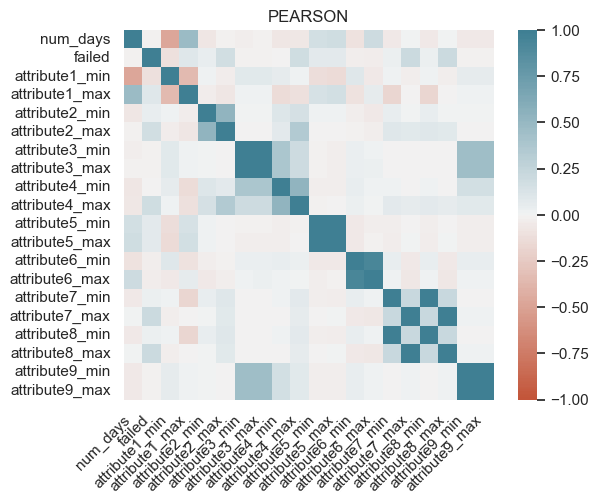

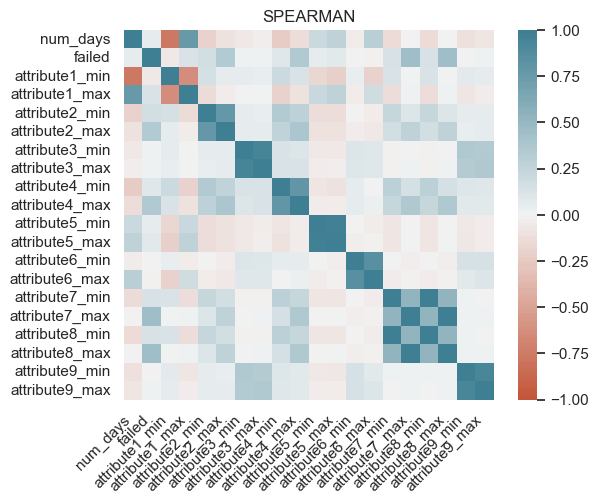

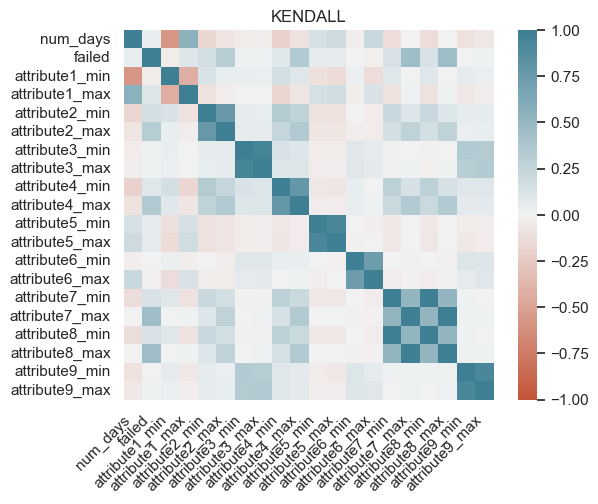

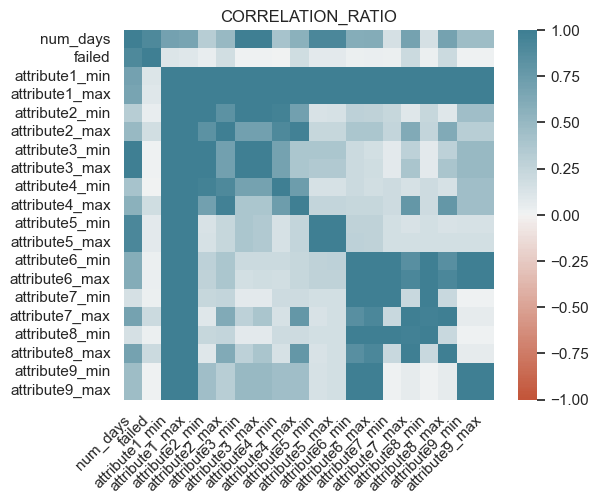

In [79]:
def correlation_ratio(categorical_feature, numeric_feature):
    cats, freqs = np.unique(categorical_feature, return_counts=True)
    numeric_mean = np.mean(numeric_feature)
    sig_y_bar = 0
    for i in range(len(cats)):
        category_mean = np.mean(numeric_feature[categorical_feature == cats[i]])
        sig_y_bar += np.square(category_mean - numeric_mean) * freqs[i]
    sig_y = np.sum(np.square(numeric_feature - numeric_mean))
    statistic = np.sqrt(sig_y_bar / sig_y)
    return statistic

data = df_devices.drop(['device', 'date_min', 'date_max'], axis=1)

for each in ['pearson', 'spearman', 'kendall', correlation_ratio]:
    corr = data.corr(method=each)
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    try:
        ax.set_title(each.upper())
    except:
        ax.set_title(each.__name__.upper())
                 
    plt.show()

## SPECIFIC CASES (visual checking)

In [3]:
df.groupby('failure').agg(num_unique_devices=('device','nunique'),
                          num_incidents=('device','count')
                          )

,num_unique_devices,num_incidents
failure,,
0,1169,124388
1,106,106


In [4]:
#df.device.value_counts()

#df[df['failure']==1][['device', 'failure']].drop_duplicates()
devices_with_failure = df[df['failure']==1].device.unique().tolist()
print(devices_with_failure)


devices_without_failure = df[~df['device'].isin(devices_with_failure)].device.unique().tolist()
print(devices_without_failure)

['S1F0RRB1', 'S1F0CTDN', 'W1F0PNA5', 'W1F13SRV', 'W1F1230J', 'W1F0T034', 'S1F0GG8X', 'S1F023H2', 'S1F0QY11', 'S1F0S2WJ', 'W1F0Z1W9', 'W1F15S4D', 'Z1F0LVPW', 'Z1F0NVZA', 'Z1F1FCH5', 'S1F0P3G2', 'W1F0F6BN', 'W1F0P114', 'W1F0X4FC', 'S1F0LCTV', 'W1F03DP4', 'W1F0FW0S', 'S1F10E6M', 'S1F11MB0', 'W1F0SGHR', 'W1F0VDH2', 'W1F0TA59', 'Z1F0LVGY', 'Z1F0MCCA', 'Z1F0P5D9', 'W1F0NZZZ', 'W1F0T074', 'S1F0DSTY', 'S1F0TQCV', 'Z1F04GCH', 'W1F08EDA', 'W1F1C9TE', 'S1F0S4CA', 'W1F19BPT', 'Z1F130LH', 'S1F0GJW3', 'S1F0LD2C', 'W1F0Q8FH', 'Z1F0FSBY', 'W1F0Z4EA', 'Z1F0QH0C', 'S1F0S4T6', 'W1F1CDDP', 'S1F0S57T', 'S1F0JD7P', 'S1F13H80', 'Z1F148T1', 'S1F0RSZP', 'S1F0GKFX', 'S1F0LCVC', 'W1F1BZTM', 'Z1F1RJFA', 'S1F13589', 'S1F136J0', 'S1F0F4EB', 'W1F1C9WG', 'S1F0RR35', 'Z1F1653X', 'Z1F1AG5N', 'W1F0KCP2', 'W1F0M35B', 'Z1F1901P', 'S1F0GKL6', 'Z1F0K451', 'W1F03D4L', 'W1F0FKWW', 'S1F0PJJW', 'W1F0X5GW', 'S1F0L0DW', 'W1F0WBTM', 'S1F0GSD9', 'S1F0QF3R', 'W1F0Z3KR', 'W1F0M4BZ', 'Z1F0B4XZ', 'W1F0GCAZ', 'Z1F0LSNZ', 'Z1F1VQFY', 'Z1

In [5]:
df[df['device'].isin(devices_with_failure)].sort_values(['device','date']).head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
1170,2015-01-02,S1F023H2,0,161679800,0,0,1,19,495730,16,16,3
2333,2015-01-03,S1F023H2,0,182358672,0,0,1,19,496974,16,16,3
3496,2015-01-04,S1F023H2,0,204752808,0,0,1,19,497559,16,16,3
4658,2015-01-05,S1F023H2,0,226982888,0,0,1,19,498753,16,16,3


In [6]:
device = 'W1F0T034'

device = 'W1F1230J'

print(len(df[df['device']==device].sort_values(['device','date'])))
df[df['device']==device].sort_values(['device','date']).tail(20)

14


,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
815,2015-01-01,W1F1230J,0,160609528,0,0,0,14,307719,0,0,0
1978,2015-01-02,W1F1230J,0,187043960,0,0,0,14,309041,0,0,0
3141,2015-01-03,W1F1230J,0,212033256,0,0,0,14,310378,0,0,0
4303,2015-01-04,W1F1230J,0,231117752,0,0,0,14,311765,0,0,0
5464,2015-01-05,W1F1230J,0,14394264,0,0,0,14,313068,0,0,0
6567,2015-01-06,W1F1230J,0,43272744,0,0,0,14,314337,0,0,0
7419,2015-01-07,W1F1230J,0,61165160,0,0,0,14,315687,0,0,0
8175,2015-01-08,W1F1230J,0,81394392,0,0,0,14,317064,0,0,0
8931,2015-01-09,W1F1230J,0,110557480,0,0,0,14,318382,0,0,0
9686,2015-01-10,W1F1230J,0,134310728,0,0,0,14,319719,0,0,0


In [50]:
device='S1F01085'

print(len(df[df['device']==device].sort_values(['device','date'])))
df[df['device']==device].sort_values(['device','date']).tail(50)

6


,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1163,2015-01-02,S1F01085,0,1650864,56,0,52,6,407438,0,0,7
2326,2015-01-03,S1F01085,0,124017368,56,0,52,6,407438,0,0,7
3489,2015-01-04,S1F01085,0,128073224,56,0,52,6,407439,0,0,7
4651,2015-01-05,S1F01085,0,97393448,56,0,52,6,408114,0,0,7
5812,2015-01-06,S1F01085,0,128832128,56,0,52,6,409404,0,0,7


In [8]:
df.

(124494, 12)